<a href="https://colab.research.google.com/github/Berasravani/FMML_LAB_MODULES/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

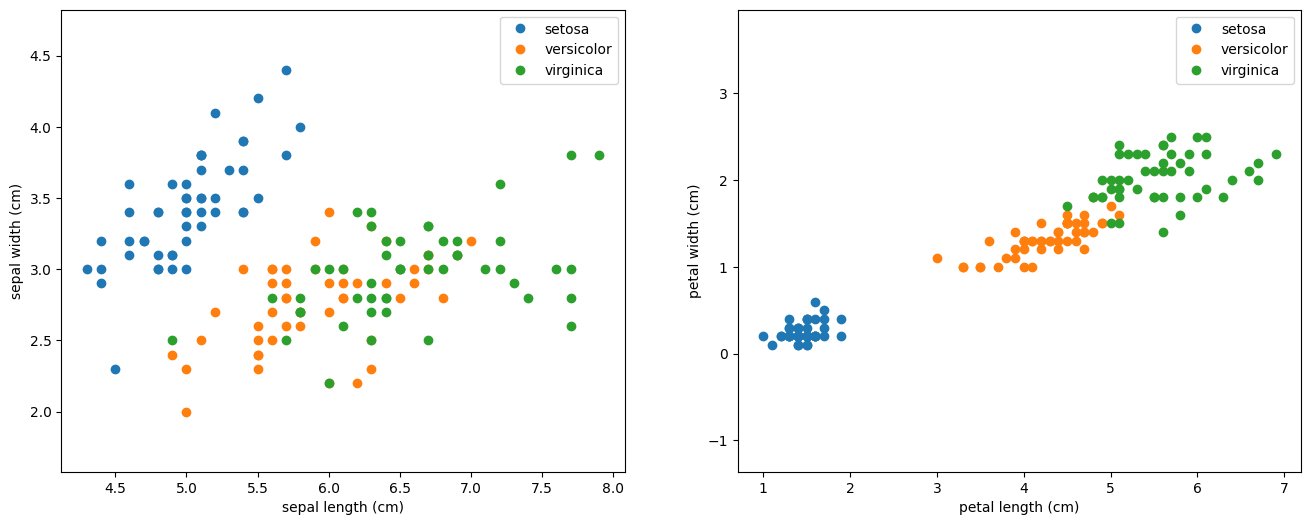

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 385.99it/s]


# Plot training progress

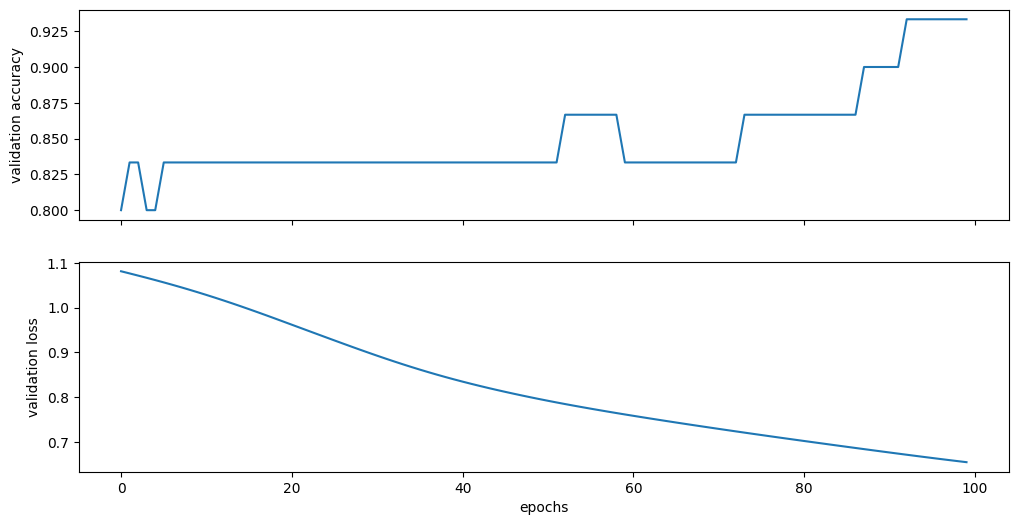

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

#Question1:-

Sure, let's explore changing the number of hidden layers in a neural network. The number of hidden layers is a crucial architectural decision in designing a neural network, as it greatly affects how the network learns and represents data.

Here's an example using Python and TensorFlow/Keras to create a simple neural network with varying numbers of hidden layers. We'll use the classic MNIST dataset for digit classification.

           
           First, let's start with a neural network with 1 hidden layer:



In [9]:
import tensorflow as tf
from tensorflow import keras

# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model with 1 hidden layer
model_1layer = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_1layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_1layer.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model_1layer.evaluate(test_images, test_labels)
print('Test accuracy with 1 hidden layer:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2643 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1146 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0785 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9814
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9741
Test accuracy with 1 hidden layer: 0.9740999937057495


         Now, let's create a similar model but with 2 hidden layers:

In [10]:
# Build the model with 2 hidden layers
model_2layers = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_2layers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_2layers.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model_2layers.evaluate(test_images, test_labels)
print('Test accuracy with 2 hidden layers:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2433 - accuracy: 0.9291
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1038 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0719 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0555 - accuracy: 0.9827
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9767
Test accuracy with 2 hidden layers: 0.9767000079154968


In these examples, we've created two models: one with 1 hidden layer and another with 2 hidden layers. We then trained and evaluated both models on the MNIST dataset. You can see how changing the number of hidden layers can impact the accuracy and performance of the model.







#Question:-

Certainly! Changing the number of neurons in the hidden layer is another important aspect of neural network design. Here's an example using Python and TensorFlow/Keras to create two models with different numbers of neurons in the hidden layer:

     First, a neural network with 64 neurons in the hidden layer:

In [11]:
import tensorflow as tf
from tensorflow import keras

# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model with 64 neurons in the hidden layer
model_64_neurons = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_64_neurons.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_64_neurons.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model_64_neurons.evaluate(test_images, test_labels)
print('Test accuracy with 64 neurons:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3029 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1513 - accuracy: 0.9558
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1096 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.9712
Test accuracy with 64 neurons: 0.9711999893188477


      Next, a neural network with 256 neurons in the hidden layer:



In [12]:
# Build the model with 256 neurons in the hidden layer
model_256_neurons = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_256_neurons.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_256_neurons.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model_256_neurons.evaluate(test_images, test_labels)
print('Test accuracy with 256 neurons:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2210 - accuracy: 0.9357
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0908 - accuracy: 0.9726
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0596 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9802
Test accuracy with 256 neurons: 0.9801999926567078


In these examples, we've created two models: one with 64 neurons and another with 256 neurons in the hidden layer. We then trained and evaluated both models on the MNIST dataset. You can observe how changing the number of neurons in the hidden layer impacts the model's accuracy and performance.







#Question3:-

Certainly! Activation functions play a crucial role in neural networks by introducing non-linearity, allowing the network to learn complex patterns in the data. Here's an example using Python and TensorFlow/Keras to create two models with different activation functions in the hidden layer:

    First, a neural network with the ReLU activation function in the hidden layer:



In [13]:
import tensorflow as tf
from tensorflow import keras

# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model with ReLU activation function
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_relu.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_relu.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model_relu.evaluate(test_images, test_labels)
print('Test accuracy with ReLU activation:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2604 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1138 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0766 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0588 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9798
Test accuracy with ReLU activation: 0.9797999858856201


     Next, a neural network with the Sigmoid activation function in the hidden layer:



In [14]:
# Build the model with Sigmoid activation function
model_sigmoid = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_sigmoid.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_sigmoid.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model_sigmoid.evaluate(test_images, test_labels)
print('Test accuracy with Sigmoid activation:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3992 - accuracy: 0.8973
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1956 - accuracy: 0.9438
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1449 - accuracy: 0.9581
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1135 - accuracy: 0.9670
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9684
Test accuracy with Sigmoid activation: 0.9684000015258789


In these examples, we've created two models: one with the ReLU activation function and another with the Sigmoid activation function in the hidden layer. We then trained and evaluated both models on the MNIST dataset. You can see how using different activation functions affects the model's accuracy and performance.





